In [1]:
import os
import networkx as nx
import matplotlib.pyplot as plt

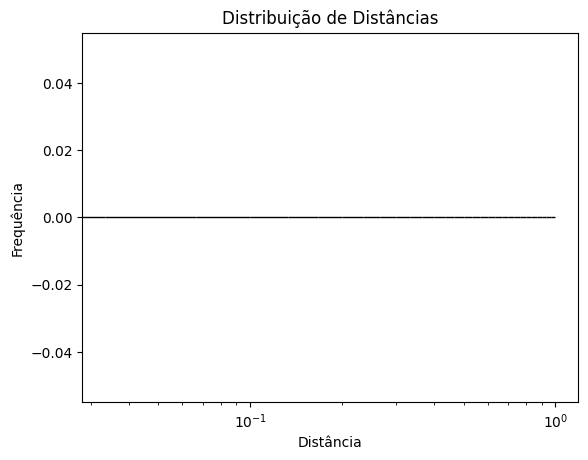

In [8]:
# Defina o caminho para a pasta 'gml'
folder_path = '/home/junior/Downloads/N_5000/dim_1/alpha_a_3.0_alpha_g_8.0/gml'

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gml"):
        file_path = os.path.join(folder_path, filename)
        
        # Carrega o arquivo GML usando networkx
        try:
            graph = nx.read_gml(file_path)
            
            # Itera sobre todas as arestas para coletar as distâncias
            for u, v, data in graph.edges(data=True):
                if 'distance' in data:
                    all_distances.append(data['distance'])
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Plota a distribuição das distâncias
plt.hist(all_distances, bins=30, edgecolor='black')
plt.title('Distribuição de Distâncias')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.xscale("log")
plt.show()

159999 distâncias encontradas no arquivo gml_1332738970.gml.gz
159999 distâncias encontradas no arquivo gml_883991837.gml.gz
Total de distâncias coletadas: 319998


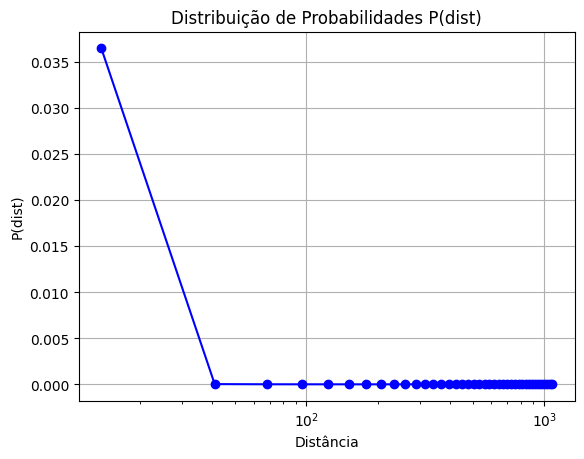

In [31]:
import os
import gzip
import re
import numpy as np
import matplotlib.pyplot as plt

# Defina o caminho para a pasta 'gml'
folder_path = '/home/junior/Downloads/N_160000/dim_1/alpha_a_2.0_alpha_g_2.0/gml'

# Regex para encontrar o valor da distância
distance_pattern = re.compile(r'distance\s([\d\.]+)')

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gz"):  # Verifica se o arquivo é .gz
        file_path = os.path.join(folder_path, filename)
        
        # Descompacta o arquivo e lê o conteúdo
        try:
            with gzip.open(file_path, 'rt') as file:
                content = file.read()
                
                # Encontra todas as ocorrências de distâncias no arquivo
                distances = distance_pattern.findall(content)
                all_distances.extend([float(d) for d in distances])  # Adiciona as distâncias encontradas
                print(f"{len(distances)} distâncias encontradas no arquivo {filename}")
                
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Após a leitura, verifica quantas distâncias foram coletadas
print(f"Total de distâncias coletadas: {len(all_distances)}")

# Se distâncias foram encontradas, calculamos a distribuição P(dist)
if all_distances:
    # Cria os bins (intervalos) para as distâncias
    num_bins = 40
    counts, bin_edges = np.histogram(all_distances, bins=num_bins, density=True)

    # Calcula os valores centrais de cada bin
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plota a distribuição de probabilidades P(dist)
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
    plt.title('Distribuição de Probabilidades P(dist)')
    plt.xlabel('Distância')
    plt.ylabel('P(dist)')
    plt.xscale("log")
    #plt.yscale("log")
    plt.grid(True)
    plt.show()
else:
    print("Nenhuma distância foi encontrada.")


159999 distâncias encontradas no arquivo gml_555778795.gml.gz
Total de distâncias coletadas: 159999


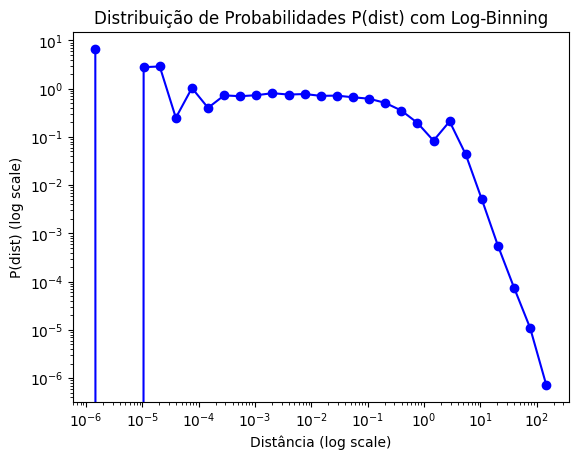

In [33]:
import os
import gzip
import re
import numpy as np
import matplotlib.pyplot as plt

# Defina o caminho para a pasta 'gml'
folder_path = '/home/junior/Downloads/N_320000/dim_1/alpha_a_0.0_alpha_g_2.0/gml'

# Regex para encontrar o valor da distância
distance_pattern = re.compile(r'distance\s([\d\.]+)')

# Lista para armazenar todas as distâncias
all_distances = []

# Itera sobre todos os arquivos na pasta 'gml'
for filename in os.listdir(folder_path):
    if filename.endswith(".gz"):  # Verifica se o arquivo é .gz
        file_path = os.path.join(folder_path, filename)
        
        # Descompacta o arquivo e lê o conteúdo
        try:
            with gzip.open(file_path, 'rt') as file:
                content = file.read()
                
                # Encontra todas as ocorrências de distâncias no arquivo
                distances = distance_pattern.findall(content)
                all_distances.extend([float(d) for d in distances])  # Adiciona as distâncias encontradas
                print(f"{len(distances)} distâncias encontradas no arquivo {filename}")
                
        except Exception as e:
            print(f"Erro ao processar {filename}: {e}")

# Após a leitura, verifica quantas distâncias foram coletadas
print(f"Total de distâncias coletadas: {len(all_distances)}")

# Se distâncias foram encontradas, calculamos a distribuição P(dist) com log-binning
if all_distances:
    # Número de bins logarítmicos
    num_bins = 30

    # Criar bins logarítmicos
    min_dist = min(all_distances)
    max_dist = max(all_distances)
    log_bins = np.logspace(np.log10(min_dist), np.log10(max_dist), num_bins)

    # Contagem dos valores em bins logarítmicos
    counts, bin_edges = np.histogram(all_distances, bins=log_bins, density=True)

    # Calcula os valores centrais de cada bin
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Plota a distribuição de probabilidades P(dist) com escala logarítmica
    plt.plot(bin_centers, counts, marker='o', linestyle='-', color='b')
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Distribuição de Probabilidades P(dist) com Log-Binning')
    plt.xlabel('Distância (log scale)')
    plt.ylabel('P(dist) (log scale)')
    #plt.grid(True, which="both", ls="--")
    plt.show()
else:
    print("Nenhuma distância foi encontrada.")
